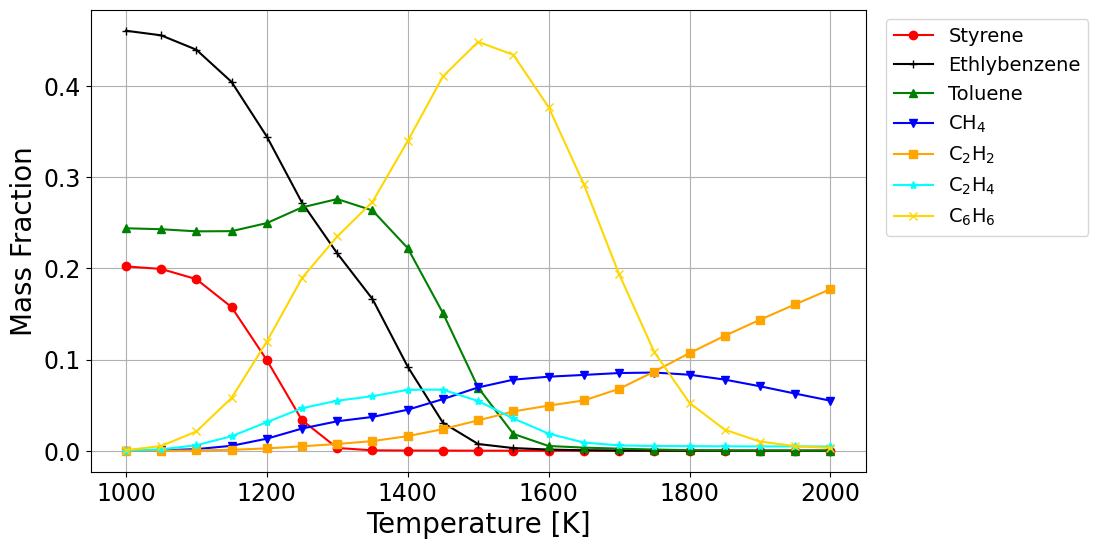

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

def readLastMoleFraction(temperature, speciesName):
    try:
        fileName = os.path.expanduser(f'~/code/plastic/ps/0d/data/0D_PS_5ms_mass_{temperature}K.csv')
        data = pd.read_csv(fileName)

        # speciesName이 포함된 컬럼을 자동 탐색
        matching_cols = [col for col in data.columns if speciesName in col]
        if not matching_cols:
            return None

        columnName = matching_cols[0]  # 예: 'Mole_fraction_C6H5C2H5_Soln#2 ()'
        return float(data[columnName].iloc[-1])
    except (FileNotFoundError, KeyError, IndexError, ValueError):
        return None


# Define temperatures and species
temperatures = np.array([1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000])
chemkin_base_species = ['Mass_fraction_C6H5C2H5', 'Mass_fraction_C6H5C2H3', 'Mass_fraction_C7H8', 'Mass_fraction_CH4',
                        'Mass_fraction_C2H2', 'Mass_fraction_C2H4', 'Mass_fraction_C6H6']
chemkin_markers = ['o', '+', '^', 'v', 's', '*', 'x']
chemkin_colors = ['red', 'black', 'green', 'blue', 'orange', 'cyan', 'gold']
chemkin_labels = ['Styrene', 'Ethlybenzene', 'Toluene', '$\\rm{CH}_4$', '$\\rm{C}_2\\rm{H}_2$', '$\\rm{C}_2\\rm{H}_4$', '$\\rm{C}_6\\rm{H}_6$']


# Create the plot
plt.figure(figsize=(10, 6))
legend_elements = []

# Plot data without interpolation
for base_species, marker, color, label in zip(chemkin_base_species, chemkin_markers, chemkin_colors, chemkin_labels):
    mole_fractions = [readLastMoleFraction(temp, base_species) for temp in temperatures]
    valid_indices = [i for i, val in enumerate(mole_fractions) if val is not None]
    valid_temperatures = temperatures[valid_indices]
    valid_mole_fractions = np.array([mole_fractions[i] for i in valid_indices])
    
    # Plot line with markers (no interpolation)
    plt.plot(valid_temperatures, valid_mole_fractions, color=color, marker=marker, linestyle='-', label=label)
    
    # Add to legend
    legend_elements.append(Line2D([0], [0], color=color, marker=marker, linestyle='-', label=label))

# Set plot labels and formatting
plt.xlabel('Temperature [K]', fontsize=20)
plt.ylabel('Mass Fraction', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.grid(True)
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1.0), prop={'size': 14})

# Save and show the plot
plt.savefig('./fig/0D_ps_5ms_mass.pdf', bbox_inches='tight')
plt.show()
